In [ ]:
%pip install opencv-python

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.7/78.2 GB disk)


In [ ]:
# Download COCO val
import torch
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
!unzip -q tmp.zip -d datasets && rm tmp.zip  # unzip

100%|██████████| 780M/780M [00:09<00:00, 84.2MB/s]


In [ ]:
# Validate YOLOv8n on COCO8 val
!yolo val model=yolov8n.pt data=coco8.yaml

100% 6.25M/6.25M [00:00<00:00, 113MB/s]
Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

Dataset 'coco8.yaml' images not found ⚠️, missing path '/content/datasets/coco8/images/val'
100% 433k/433k [00:00<00:00, 13.8MB/s]
Unzipping /content/datasets/coco8.zip to /content/datasets/coco8...: 100% 25/25 [00:00<00:00, 3150.49file/s]
Dataset download success ✅ (0.9s), saved to /content/datasets

100% 755k/755k [00:00<00:00, 17.6MB/s]
val: Scanning /content/datasets/coco8/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100% 4/4 [00:00<00:00, 91.28it/s]
val: New cache created: /content/datasets/coco8/labels/val.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:02<00:00,  2.48s/it]
                   all          4         17      0.621      0.833      0.888       0.63
                person          3         10   

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os
import cv2
import sys

base_dir = "/content/drive/My Drive/Rock_Paper_Scissors"

train_data_dir = os.path.join(base_dir, "train")
val_data_dir = os.path.join(base_dir, "valid")
test_data_dir = os.path.join(base_dir, "test")

In [ ]:
image_size = (640, 640)
class_names = ["paper", "rock", "scissors"]

## Train Model

In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')

# Train the model
model.train(data=os.path.join(base_dir, "data.yaml"), epochs=50, imgsz=640)

Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/My Drive/Rock_Paper_Scissors/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

train: Scanning /content/drive/My Drive/Rock_Paper_Scissors/train/labels... 6455 images, 2516 backgrounds, 0 corrupt: 100%|██████████| 6455/6455 [27:17<00:00,  3.94it/s]


train: New cache created: /content/drive/My Drive/Rock_Paper_Scissors/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/My Drive/Rock_Paper_Scissors/valid/labels... 576 images, 238 backgrounds, 0 corrupt: 100%|██████████| 576/576 [01:56<00:00,  4.93it/s]


val: New cache created: /content/drive/My Drive/Rock_Paper_Scissors/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.45G      1.269      2.963      1.449         10        640: 100%|██████████| 404/404 [02:49<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.94it/s]


                   all        576        400      0.565      0.481      0.489      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.25G      1.349       2.12      1.488          7        640: 100%|██████████| 404/404 [02:43<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.89it/s]

                   all        576        400      0.485      0.528      0.479      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.27G      1.371      1.881       1.49          6        640: 100%|██████████| 404/404 [02:41<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.27it/s]

                   all        576        400      0.664      0.669      0.695      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.25G      1.335      1.729      1.451         13        640: 100%|██████████| 404/404 [02:39<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:08<00:00,  2.10it/s]

                   all        576        400       0.71      0.554      0.656      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.25G       1.29      1.603      1.422          6        640: 100%|██████████| 404/404 [02:36<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.92it/s]

                   all        576        400      0.698      0.719      0.764      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.25G      1.224      1.429      1.375          9        640: 100%|██████████| 404/404 [02:36<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.83it/s]

                   all        576        400      0.807      0.641      0.746       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.25G      1.177      1.336      1.347          6        640: 100%|██████████| 404/404 [02:34<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:08<00:00,  2.08it/s]

                   all        576        400      0.837      0.825       0.89      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.25G      1.175      1.294      1.343         13        640: 100%|██████████| 404/404 [02:33<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  2.00it/s]

                   all        576        400      0.837      0.786      0.868       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.25G      1.139       1.22      1.317         13        640: 100%|██████████| 404/404 [02:38<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.92it/s]

                   all        576        400      0.772      0.781      0.816      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.25G      1.099      1.155      1.283          5        640: 100%|██████████| 404/404 [02:37<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.72it/s]

                   all        576        400      0.888      0.804      0.881      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.25G      1.099      1.124      1.289          9        640: 100%|██████████| 404/404 [02:37<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.90it/s]

                   all        576        400      0.882      0.852      0.905      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.25G      1.074       1.08      1.272          7        640: 100%|██████████| 404/404 [02:37<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.58it/s]

                   all        576        400      0.879      0.895      0.923      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.25G       1.04      1.034      1.252          7        640: 100%|██████████| 404/404 [02:36<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.97it/s]

                   all        576        400      0.868      0.852      0.903      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.25G      1.036     0.9979      1.251          9        640: 100%|██████████| 404/404 [02:36<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.82it/s]

                   all        576        400      0.899      0.884       0.92      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.25G       1.01     0.9767      1.234         15        640: 100%|██████████| 404/404 [02:35<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.95it/s]

                   all        576        400      0.904      0.908      0.927      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.25G     0.9921     0.9515      1.218          6        640: 100%|██████████| 404/404 [02:37<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.53it/s]

                   all        576        400      0.892      0.887      0.921      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.25G     0.9902     0.9203      1.217          5        640: 100%|██████████| 404/404 [02:39<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.72it/s]

                   all        576        400      0.899      0.893       0.93      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.25G     0.9649     0.8839      1.203          9        640: 100%|██████████| 404/404 [02:41<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.82it/s]

                   all        576        400      0.903      0.883      0.935      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.25G     0.9526     0.8733      1.203          5        640: 100%|██████████| 404/404 [02:40<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.68it/s]

                   all        576        400      0.883       0.89      0.932        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.25G     0.9359     0.8484      1.182          7        640: 100%|██████████| 404/404 [02:44<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.45it/s]


                   all        576        400      0.937      0.877      0.935      0.717

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.25G     0.9206     0.8361       1.18         10        640: 100%|██████████| 404/404 [02:42<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.54it/s]

                   all        576        400      0.947        0.9      0.945      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.25G     0.9098     0.8157       1.17         15        640: 100%|██████████| 404/404 [02:44<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:08<00:00,  2.15it/s]

                   all        576        400      0.925      0.902      0.945      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.25G     0.9105     0.8051      1.168          8        640: 100%|██████████| 404/404 [02:40<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.63it/s]

                   all        576        400      0.906      0.908      0.939      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.25G     0.9082     0.7863      1.166         14        640: 100%|██████████| 404/404 [02:41<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.65it/s]

                   all        576        400      0.947      0.905      0.947      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.25G     0.8865     0.7741      1.158         14        640: 100%|██████████| 404/404 [02:39<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.92it/s]

                   all        576        400      0.934      0.894      0.939      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.25G     0.8651     0.7326      1.139         11        640: 100%|██████████| 404/404 [02:42<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.97it/s]

                   all        576        400      0.908      0.907      0.935      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.25G     0.8669     0.7331      1.143          7        640: 100%|██████████| 404/404 [02:42<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.25it/s]

                   all        576        400      0.926      0.891      0.938      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.25G     0.8623     0.7168      1.135         19        640: 100%|██████████| 404/404 [02:37<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.91it/s]

                   all        576        400      0.929      0.919      0.949      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.25G      0.846     0.7078      1.129         11        640: 100%|██████████| 404/404 [02:37<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.06it/s]

                   all        576        400       0.94       0.93      0.951       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.25G     0.8337     0.6903      1.125          4        640: 100%|██████████| 404/404 [02:37<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.94it/s]

                   all        576        400      0.944      0.915      0.952      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.25G     0.8233     0.6874      1.118          3        640: 100%|██████████| 404/404 [02:36<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.94it/s]

                   all        576        400      0.956      0.914      0.947      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.25G     0.8089     0.6598      1.111          8        640: 100%|██████████| 404/404 [02:36<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.40it/s]

                   all        576        400      0.947      0.926      0.957      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.25G     0.7962     0.6592      1.098          9        640: 100%|██████████| 404/404 [02:39<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.87it/s]

                   all        576        400      0.957      0.919      0.961      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.25G     0.7848     0.6435      1.094         11        640: 100%|██████████| 404/404 [02:37<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.94it/s]

                   all        576        400      0.956       0.93      0.954      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.25G     0.7899     0.6403      1.097         12        640: 100%|██████████| 404/404 [02:38<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.50it/s]

                   all        576        400      0.949      0.914       0.96      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.25G     0.7659     0.6203      1.082         13        640: 100%|██████████| 404/404 [02:40<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.03it/s]

                   all        576        400      0.956      0.913      0.953      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.25G      0.767     0.6159      1.081         12        640: 100%|██████████| 404/404 [02:41<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:08<00:00,  2.08it/s]

                   all        576        400      0.928      0.945      0.957      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.25G     0.7576     0.6046      1.078         10        640: 100%|██████████| 404/404 [02:39<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.33it/s]

                   all        576        400      0.954      0.928      0.959      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.25G     0.7451     0.6015      1.075         10        640: 100%|██████████| 404/404 [02:44<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.93it/s]


                   all        576        400      0.968      0.898       0.96       0.77

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.25G     0.7509     0.5876      1.079          9        640: 100%|██████████| 404/404 [02:39<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:08<00:00,  2.11it/s]

                   all        576        400      0.964      0.915      0.958      0.766


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.25G     0.6173     0.3723          1          5        640: 100%|██████████| 404/404 [02:34<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.49it/s]

                   all        576        400      0.949      0.914      0.954      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.25G     0.5957     0.3587     0.9931          5        640: 100%|██████████| 404/404 [02:32<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.94it/s]

                   all        576        400      0.962      0.934      0.959      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.25G     0.5767     0.3408     0.9729          6        640: 100%|██████████| 404/404 [02:33<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.13it/s]

                   all        576        400       0.96      0.926      0.957      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.25G     0.5656     0.3296     0.9705          5        640: 100%|██████████| 404/404 [02:31<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:08<00:00,  2.03it/s]

                   all        576        400      0.955      0.932      0.956      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.25G     0.5592     0.3213     0.9641          5        640: 100%|██████████| 404/404 [02:31<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:08<00:00,  2.14it/s]

                   all        576        400      0.952      0.929      0.958      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.25G     0.5428      0.311     0.9546          3        640: 100%|██████████| 404/404 [02:30<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.96it/s]

                   all        576        400      0.967      0.918      0.958      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.25G     0.5276     0.2988     0.9495          4        640: 100%|██████████| 404/404 [02:31<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.72it/s]

                   all        576        400      0.962      0.918      0.959      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.25G     0.5182     0.2985     0.9438          5        640: 100%|██████████| 404/404 [02:28<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:09<00:00,  1.91it/s]

                   all        576        400      0.955      0.937       0.96      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.25G     0.5116     0.2889       0.94          6        640: 100%|██████████| 404/404 [02:31<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.42it/s]

                   all        576        400      0.958      0.935       0.96      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.25G     0.5045     0.2862     0.9379         10        640: 100%|██████████| 404/404 [02:36<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.13it/s]

                   all        576        400      0.968      0.924      0.959      0.783



50 epochs completed in 2.321 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.60it/s]


                   all        576        400      0.955      0.937       0.96      0.783
                 Paper        132        139      0.969      0.921      0.965      0.787
                  Rock        121        141      0.943      0.965      0.953      0.768
              Scissors        116        120      0.954      0.925      0.961      0.796
Speed: 0.5ms preprocess, 2.8ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fa2d19bd9f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
# Predict on the entire test directory
results = model.predict(source=os.path.join(test_data_dir, "images"), save=True)


image 1/304 /content/drive/My Drive/Rock_Paper_Scissors/test/images/10e0gvm_jpg.rf.3b68a834fab647f30a57fc3ea92d4cd2.jpg: 640x640 (no detections), 40.1ms
image 2/304 /content/drive/My Drive/Rock_Paper_Scissors/test/images/15208484cellblock_jpg.rf.95cbda1e169a66105fbf2aa22959a73b.jpg: 640x640 (no detections), 8.9ms
image 3/304 /content/drive/My Drive/Rock_Paper_Scissors/test/images/19171_298_298_1_0_jpg.rf.0024dfb25d7b5a13a78e94fca47ef004.jpg: 640x640 (no detections), 9.2ms
image 4/304 /content/drive/My Drive/Rock_Paper_Scissors/test/images/20061004021831_jpg.rf.8667d8aa5599deb901289c024eed4313.jpg: 640x640 (no detections), 18.4ms
image 5/304 /content/drive/My Drive/Rock_Paper_Scissors/test/images/20220216_221550_jpg.rf.02a071a383151953fcf8671fc7fca3af.jpg: 640x640 1 Scissors, 16.6ms
image 6/304 /content/drive/My Drive/Rock_Paper_Scissors/test/images/20220216_221819_jpg.rf.295ebb583293f91f74e1700f0ab0639a.jpg: 640x640 1 Rock, 20.9ms
image 7/304 /content/drive/My Drive/Rock_Paper_Scissor

AttributeError: 'list' object has no attribute 'show'

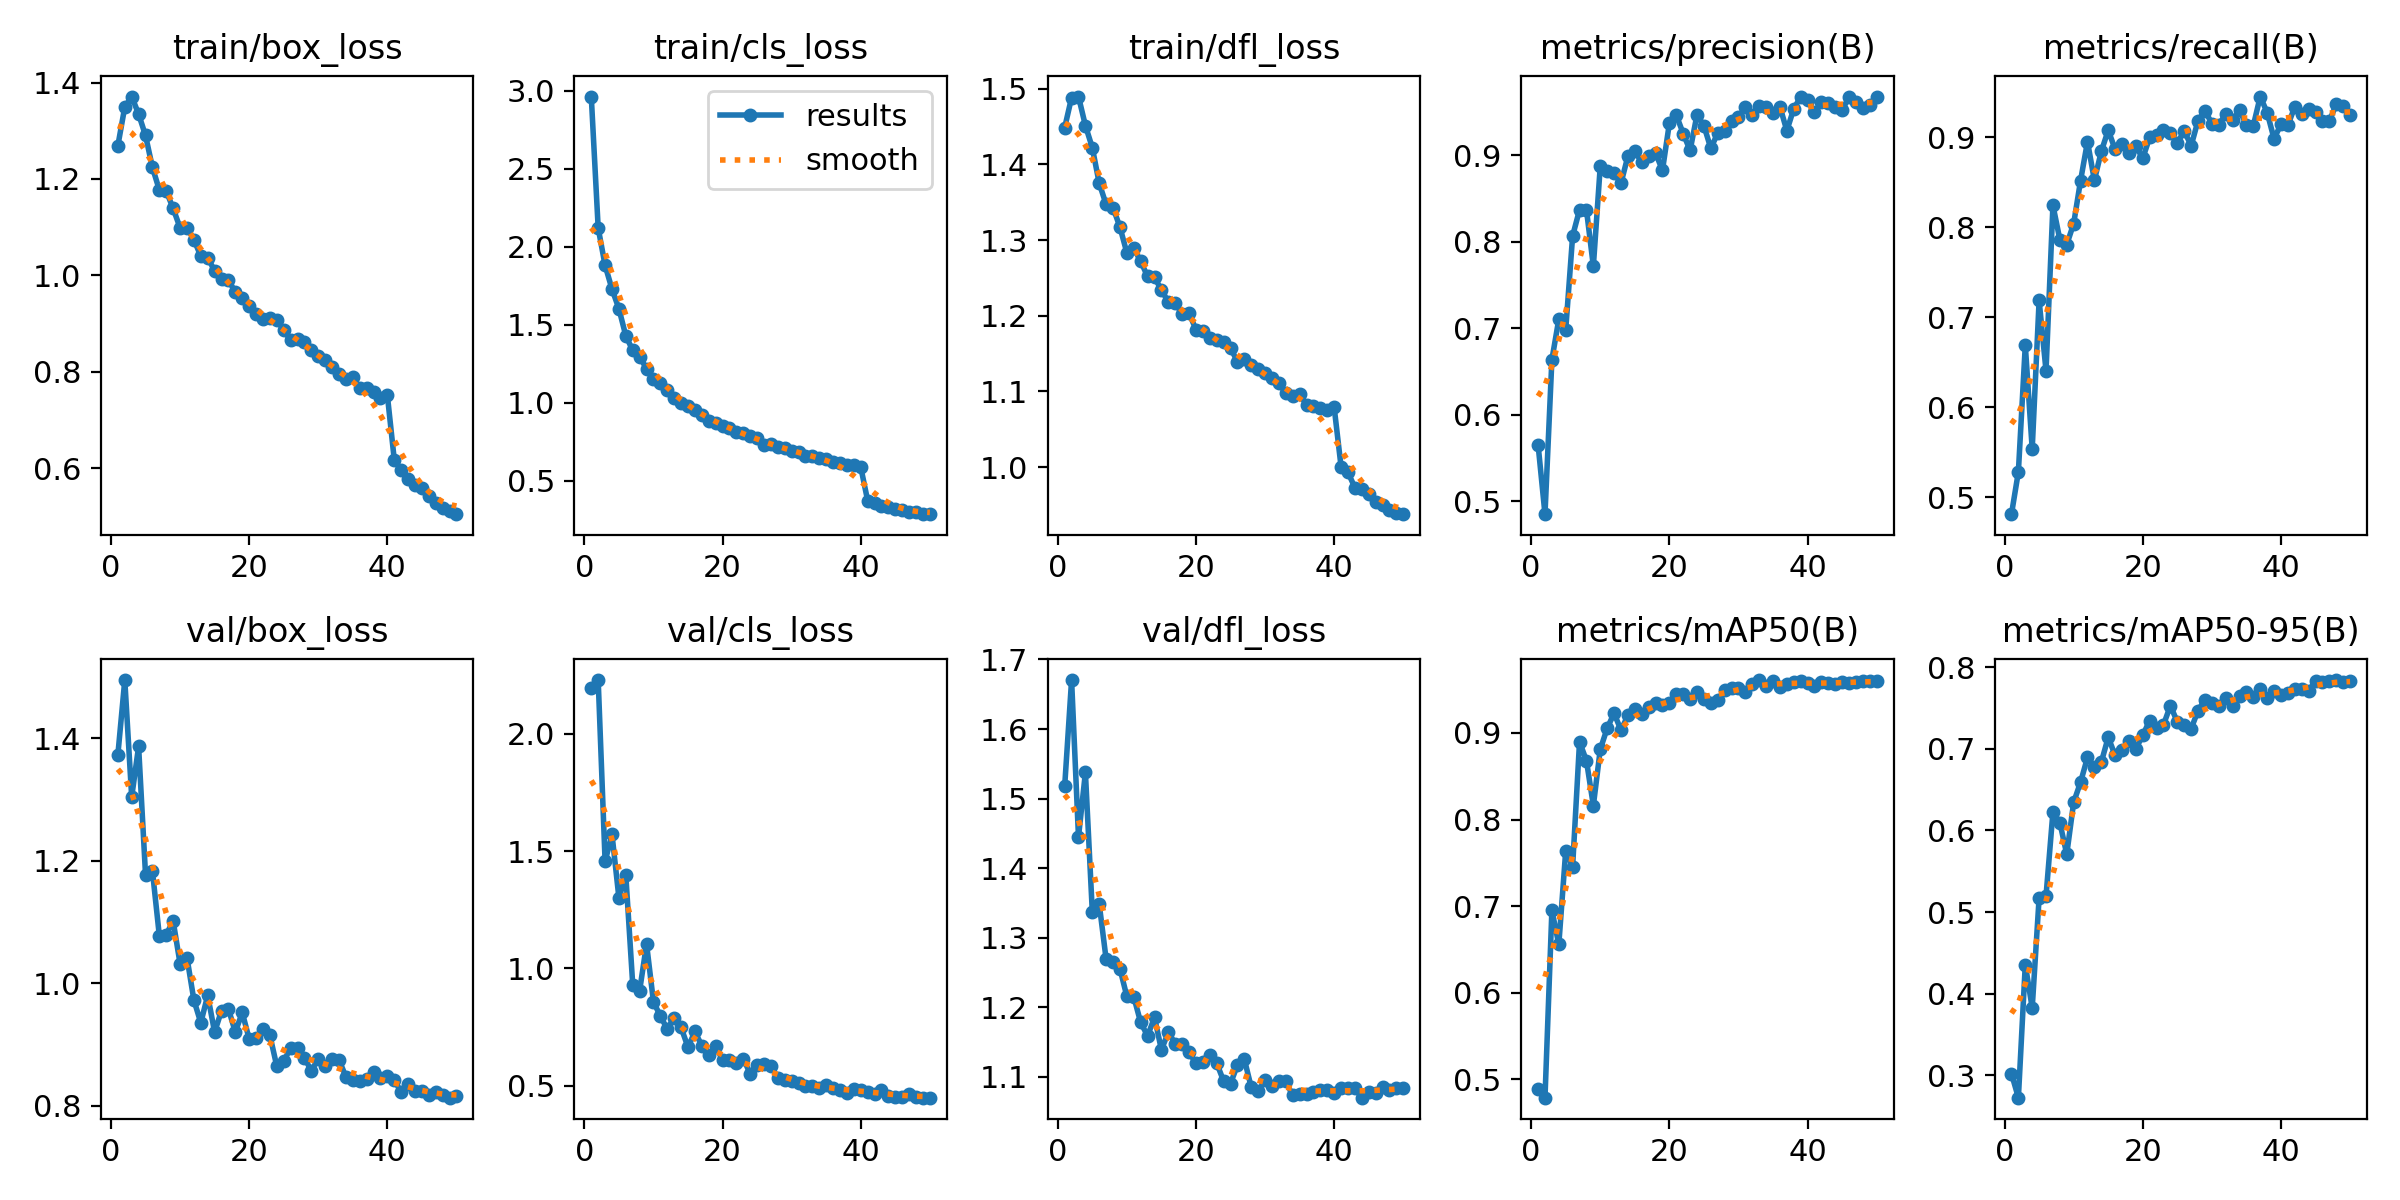

In [ ]:
from IPython.display import Image
Image('/content/runs/detect/train/results.png')
# Image('/content/runs/detect/train/confusion_matrix.png')

In [ ]:
# Load a model
model_best = YOLO('/content/runs/detect/train/weights/best.pt')  # load a custom trained model

# Export the model
model_best.export(format="onnx")

Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (6.0 MB)

ONNX: starting export with onnx 1.16.2 opset 17...
ONNX: export success ✅ 0.8s, saved as '/content/runs/detect/train/weights/best.onnx' (11.7 MB)

Export complete (2.5s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/content/runs/detect/train/weights/best.onnx imgsz=640 data=/content/drive/My Drive/Rock_Paper_Scissors/data.yaml  
Visualize:       https://netron.app


'/content/runs/detect/train/weights/best.onnx'

In [ ]:
# Load a model
model_last = YOLO('/content/runs/detect/train/weights/last.pt')  # load a custom trained model

# Export the model
model_last.export(format="onnx")

Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/last.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (6.0 MB)

ONNX: starting export with onnx 1.16.2 opset 17...
ONNX: export success ✅ 1.2s, saved as '/content/runs/detect/train/weights/last.onnx' (11.7 MB)

Export complete (2.7s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train/weights/last.onnx imgsz=640  
Validate:        yolo val task=detect model=/content/runs/detect/train/weights/last.onnx imgsz=640 data=/content/drive/My Drive/Rock_Paper_Scissors/data.yaml  
Visualize:       https://netron.app


'/content/runs/detect/train/weights/last.onnx'

In [ ]:
import shutil

# Save the training logs and metrics
shutil.make_archive('/content/training_logs', 'zip', '/content/runs/detect/train/')

'/content/training_logs.zip'

In [ ]:
from google.colab import files
from ultralytics import YOLO
import os

# Load the model
model = YOLO(os.path.join(base_dir, "model/weights/best.pt"))  # load a custom model

# Upload an image file
uploaded = files.upload()

# Extract the file name and save it to a local file
for filename, file_content in uploaded.items():
    # Save the uploaded file to disk
    with open(filename, 'wb') as f:
        f.write(file_content)

    # Predict with the model
    results = model(filename)  # predict on the image file

    # Process the results
    for result in results:
        boxes = result.boxes  # Boxes object for bounding box outputs
        masks = result.masks  # Masks object for segmentation masks outputs
        keypoints = result.keypoints  # Keypoints object for pose outputs
        probs = result.probs  # Probs object for classification outputs
        obb = result.obb  # Oriented boxes object for OBB outputs

        # Show and save the result
        result.show()  # display to screen
        result.save(filename="result.jpg")  # save to disk

Saving ScissorsTest.jpeg to ScissorsTest (4).jpeg

image 1/1 /content/ScissorsTest (4).jpeg: 640x384 1 Scissors, 77.5ms
Speed: 17.8ms preprocess, 77.5ms inference, 819.2ms postprocess per image at shape (1, 3, 640, 384)


## Export to CoreML (Experiment Purposes)

In [ ]:
model = YOLO(os.path.join(base_dir, "model/weights/best.pt"))  # load a custom model
model.export(format="coreml")

Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.30GHz)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/drive/My Drive/Rock_Paper_Scissors/model/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (6.0 MB)
requirements: Ultralytics requirement ['coremltools>=7.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 212.6 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 4.3s, installed 1 package: ['coremltools>=7.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect




CoreML: starting export with coremltools 7.2...


Running MIL backend_mlprogram pipeline: 100%|██████████| 12/12 [00:00<00:00, 88.22 passes/s]


CoreML: export success ✅ 18.0s, saved as '/content/drive/My Drive/Rock_Paper_Scissors/model/weights/best.mlpackage' (5.9 MB)

Export complete (19.9s)
Results saved to /content/drive/My Drive/Rock_Paper_Scissors/model/weights
Predict:         yolo predict task=detect model=/content/drive/My Drive/Rock_Paper_Scissors/model/weights/best.mlpackage imgsz=640  
Validate:        yolo val task=detect model=/content/drive/My Drive/Rock_Paper_Scissors/model/weights/best.mlpackage imgsz=640 data=/content/drive/My Drive/Rock_Paper_Scissors/data.yaml  
Visualize:       https://netron.app


'/content/drive/My Drive/Rock_Paper_Scissors/model/weights/best.mlpackage'